# **Linear Regression**

## Step1: Import the libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Step2: Import the Data

In [5]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Step3: Data overview (General information about dataset)

In [6]:
#overview
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


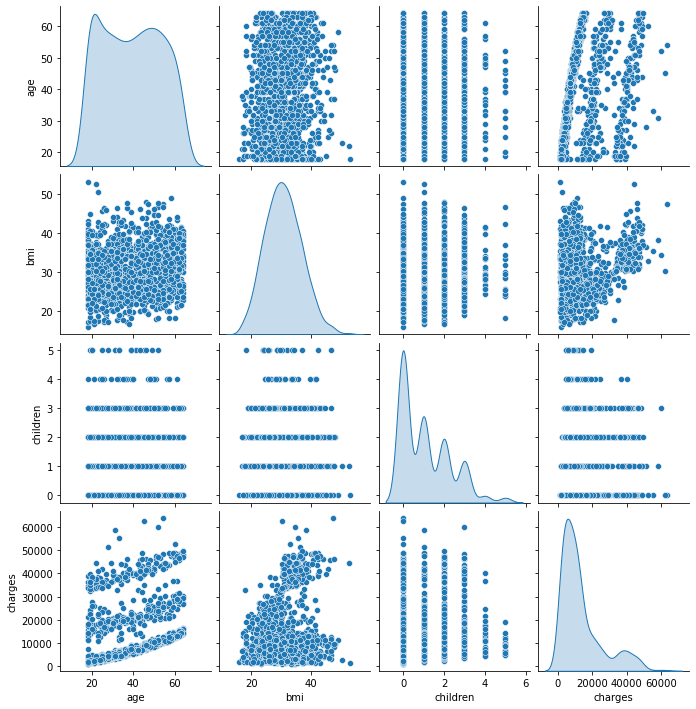

In [8]:
#plotting dataset
sns.pairplot(insurance_df,diag_kind='kde')

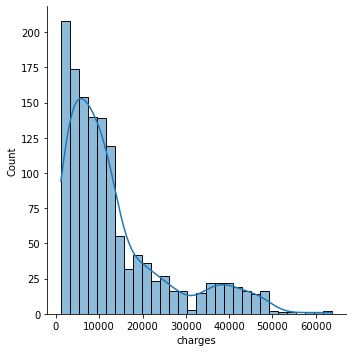

In [9]:
sns.displot(data= insurance_df, x='charges', kde=True)

## Step4: Data preparation --> Dealing with Categorical Data

### One Hot (Encode the Categorical features)

In [10]:
#Leave the answer here

In [11]:
#split the dataset to numerical dataset and objective dataset:
insurance_df_num = insurance_df.select_dtypes(exclude = "object")
insurance_df_obj = insurance_df.select_dtypes(include = "object")

In [12]:
#shape of objective dataset :
insurance_df_obj.shape

(1338, 3)

In [13]:
#apply onehot encoding to objective dataset:
insurance_df_obj = pd.get_dummies(insurance_df_obj, drop_first = True)

In [14]:
#shape of objective dataset after onehot encoding:
insurance_df_obj.shape

(1338, 5)

In [15]:
#concat numerical dataset and objective dataset:
final_insurance_df = pd.concat([insurance_df_num,insurance_df_obj], axis = 1)
final_insurance_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
#shape of new final dataset :
final_insurance_df.shape

(1338, 9)

<AxesSubplot:>

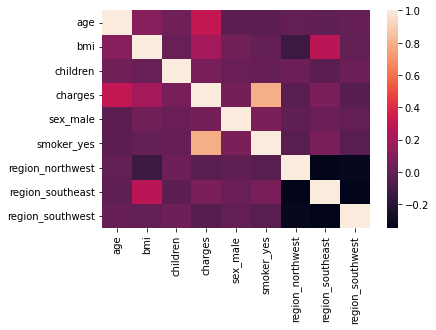

In [17]:
#final dataset corrolation plotting by heatmap: 
sns.heatmap(final_insurance_df.corr())

# 📈 Training a Linear Regression Model

## Step5: Determine the Features & Target Variable

In [18]:
#Leave the answer here

In [19]:
#features and label determination 
X = final_insurance_df.drop("charges", axis = 1)
y = final_insurance_df["charges"]

## Step6: Split the Dataset to Train & Test

In [20]:
#Leave the answer here

In [21]:
#split data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step7: Train the Model using the X_train and y_train

In [22]:
#Leave the answer here

In [23]:
#import kind of regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
#train
model.fit(X_train, y_train)

LinearRegression()

## Step8: Coeficient Matrix (Find the coefficients)

In [25]:
#Leave the answer here

In [26]:
#calculate coeficient
model.coef_

array([  261.29692414,   348.90691516,   424.11912829,   104.81182299,
       23628.36722236,  -486.93461047,  -970.96883857,  -926.32290791])

In [27]:
#create coeficient datafaram
pd.DataFrame(model.coef_, X.columns, columns=["Coeficient"])

,Coeficient
age,261.296924
bmi,348.906915
children,424.119128
sex_male,104.811823
smoker_yes,23628.367222
region_northwest,-486.934610
region_southeast,-970.968839
region_southwest,-926.322908


## Step8: Predicting Test Data

In [28]:
#Leave the answer here

In [29]:
#define predicting
y_pred = model.predict(X_test)

In [30]:
#creat datafaram for tast and prediction
pd.DataFrame({"Y_Test" : y_test, "Y_Pred" : y_pred}).head(5)

,Y_Test,Y_Pred
764,9095.06825,9016.367529
887,5272.17580,7019.976349
890,29330.98315,36870.834268
1293,9301.89355,9518.537736
259,33750.29180,26974.030822


## Step9: Evalutaing the Model (Find the error (MSE) of the model)

In [31]:
#Leave the answer here

In [32]:
#import metrics from sklearn
from sklearn import metrics

#define metricts
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,4.145451e+03
MSE,3.378051e+07
RMSE,5.812100e+03


In [33]:
insurance_df['charges'].mean()

13270.422265141257

## Step10: Residuals (Difference between y_test and y_pred)

In [34]:
#Leave the answer here

In [35]:
#calculate residuals
test_residuals=y_test-y_pred

Text(0, 0.5, 'Y-Pred')

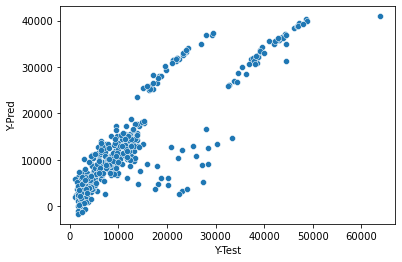

In [36]:
#plottint for test vs prediction
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

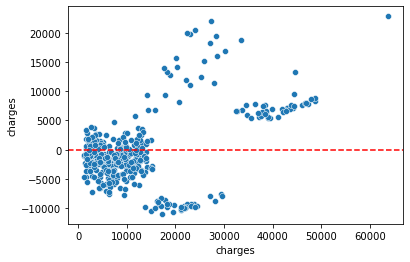

In [37]:
#plottint for test vs residuals
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

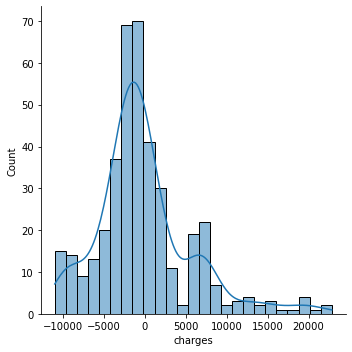

In [38]:
#plotting residuals
sns.displot(test_residuals, bins=25, kde=True)

## Step11: Saving and Loading the Model (Save the trained model and load that again)

In [39]:
#Leave the answer here

In [40]:
#import necessary library
from joblib import dump, load

In [41]:
#Save the model
final_model=LinearRegression()
final_model.fit(X,y)
dump(final_model, 'charges.joblib')

['charges.joblib']

In [42]:
# Load the Model:
load_model=load('charges.joblib')

## Step12: Predict a sample  (ex: [19, 27.9, 0,0,1,0,0,1])

In [43]:
#Leave the answer here

In [46]:
ex=[[37, 22.705, 3,1,0,0,0,0]]

In [47]:
#prediction for ex
load_model.predict(ex)

array([6561.721108])